In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("data/twitter_multi_class_sentiment.csv")
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [9]:
df["label"].value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


In [10]:
label_count = df["label_name"].value_counts(ascending=True)
label_count

,count
label_name,
surprise,572
love,1304
fear,1937
anger,2159
sadness,4666
joy,5362


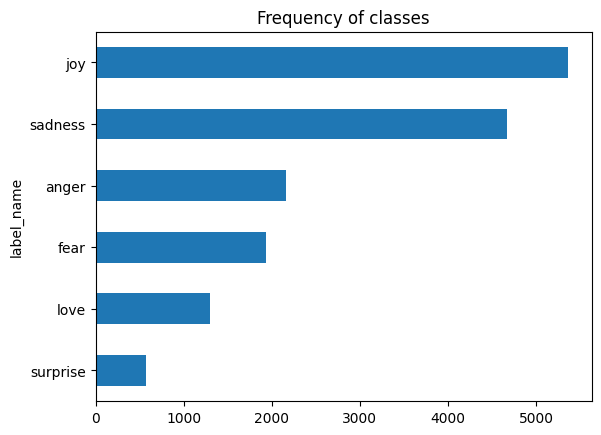

In [11]:
label_count.plot.barh()
plt.title("Frequency of classes")
plt.show()

In [12]:
df["word per tweet"] = df["text"].str.split().apply(len)
df.head()

,text,label,label_name,word per tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


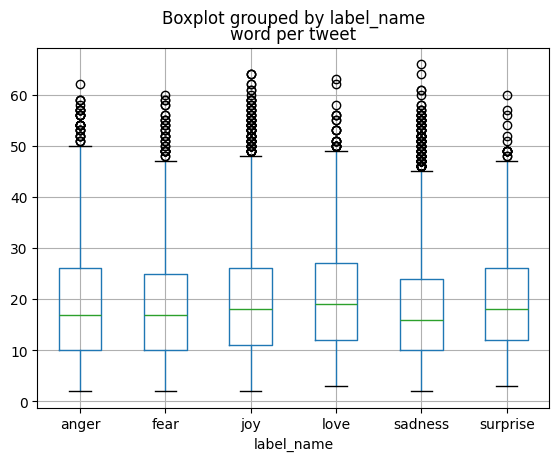

In [13]:
df.boxplot("word per tweet", by="label_name");

## Text to Token

In [14]:
from transformers import AutoTokenizer

In [15]:
model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [16]:
text = "I love machine learning. Tokenization is awesome."
text_token = tokenizer(text)

In [17]:
text_token

{'input_ids': [101, 1045, 2293, 3698, 4083, 1012, 19204, 3989, 2003, 12476, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [18]:
len(tokenizer.vocab), tokenizer.vocab_size, tokenizer.model_max_length

(30522, 30522, 512)

## Data Load and Split

In [19]:
train, test = train_test_split(df, test_size=0.3, stratify=df["label_name"])
test, validate = train_test_split(test, test_size=1/3, stratify=test["label_name"])
train.shape, test.shape, validate.shape

((11200, 4), (3200, 4), (1600, 4))

In [21]:
from datasets import Dataset, DatasetDict

In [22]:
dataset = DatasetDict({
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validate": Dataset.from_pandas(validate, preserve_index=False),
})

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'word per tweet'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'word per tweet'],
        num_rows: 3200
    })
    validate: Dataset({
        features: ['text', 'label', 'label_name', 'word per tweet'],
        num_rows: 1600
    })
})

In [23]:
dataset["train"][:2]

{'text': ['i did not feel frightened just frustrated that i wanted to go back to sleep but felt there were unfinished tasks i needed to attend to there wasn t other than to edit two articles on freud s dream of irma s injection which were near completion and have subsequently been posted on this blog',
  'i am already feeling like i am being less productive'],
 'label': [4, 1],
 'label_name': ['fear', 'joy'],
 'word per tweet': [55, 10]}

In [24]:
tokenizer(dataset["train"]["text"][:2])

{'input_ids': [[101, 1045, 2106, 2025, 2514, 10363, 2074, 10206, 2008, 1045, 2359, 2000, 2175, 2067, 2000, 3637, 2021, 2371, 2045, 2020, 14342, 8518, 1045, 2734, 2000, 5463, 2000, 2045, 2347, 1056, 2060, 2084, 2000, 10086, 2048, 4790, 2006, 19338, 1055, 3959, 1997, 20868, 2863, 1055, 13341, 2029, 2020, 2379, 6503, 1998, 2031, 3525, 2042, 6866, 2006, 2023, 9927, 102], [101, 1045, 2572, 2525, 3110, 2066, 1045, 2572, 2108, 2625, 13318, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [25]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

tokenize(dataset["train"][:2])

{'input_ids': [[101, 1045, 2106, 2025, 2514, 10363, 2074, 10206, 2008, 1045, 2359, 2000, 2175, 2067, 2000, 3637, 2021, 2371, 2045, 2020, 14342, 8518, 1045, 2734, 2000, 5463, 2000, 2045, 2347, 1056, 2060, 2084, 2000, 10086, 2048, 4790, 2006, 19338, 1055, 3959, 1997, 20868, 2863, 1055, 13341, 2029, 2020, 2379, 6503, 1998, 2031, 3525, 2042, 6866, 2006, 2023, 9927, 102], [101, 1045, 2572, 2525, 3110, 2066, 1045, 2572, 2108, 2625, 13318, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1,

In [26]:
emotion_encoded = dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [27]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'word per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'word per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
    validate: Dataset({
        features: ['text', 'label', 'label_name', 'word per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
})

In [28]:
label2id = {x["label_name"]: x["label"] for x in dataset["train"]}
id2label = {v: k for k, v in label2id.items()}


In [29]:
label2id, id2label

({'fear': 4, 'joy': 1, 'anger': 3, 'love': 2, 'sadness': 0, 'surprise': 5},
 {4: 'fear', 1: 'joy', 3: 'anger', 2: 'love', 0: 'sadness', 5: 'surprise'})

## Build Model

In [30]:
from transformers import AutoModel

In [31]:
model = AutoModel.from_pretrained(model_ckpt)
model

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [32]:
model.config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.55.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [33]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [35]:
num_labels = len(label2id)
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config)
model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [37]:
model.config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.55.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [38]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00


In [40]:
import evaluate
from transformers import TrainingArguments

In [48]:
args = TrainingArguments(
    output_dir="bert_base_train_dir",
    overwrite_output_dir = True,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    eval_strategy="epoch",
    disable_tqdm=False,
    report_to="none"
)

In [42]:
accuracy = evaluate.load("accuracy")

def compute_metrics_evaluate(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions= predictions, labels=labels)


In [43]:
from sklearn.metrics import accuracy_score, f1_score

In [52]:
def compute_metrics_sklearn(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, labels)

    return {"accuracy": acc, "f1": f1}

In [45]:
from transformers import Trainer

In [53]:
trainer = Trainer(model=model,
                  args=args,
                  train_dataset=emotion_encoded["train"],
                  eval_dataset=emotion_encoded["validate"],
                  compute_metrics=compute_metrics_sklearn,
                  tokenizer=tokenizer)

In [54]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.341651,1.000000,0.903212
2,No log,0.230603,1.000000,0.920447


TrainOutput(global_step=350, training_loss=0.545091552734375, metrics={'train_runtime': 317.2555, 'train_samples_per_second': 70.606, 'train_steps_per_second': 1.103, 'total_flos': 1001502421516800.0, 'train_loss': 0.545091552734375, 'epoch': 2.0})

In [55]:
preds_output = trainer.predict(emotion_encoded["test"])
preds_output.metrics

{'test_loss': 0.24350672960281372,
 'test_accuracy': 1.0,
 'test_f1': 0.9141776796304077,
 'test_runtime': 14.4051,
 'test_samples_per_second': 222.144,
 'test_steps_per_second': 3.471}

In [58]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_encoded["test"][:]["label"]

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       933
           1       0.94      0.92      0.93      1072
           2       0.80      0.83      0.81       261
           3       0.92      0.92      0.92       432
           4       0.87      0.88      0.88       387
           5       0.81      0.80      0.81       115

    accuracy                           0.91      3200
   macro avg       0.88      0.88      0.88      3200
weighted avg       0.91      0.91      0.91      3200



In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

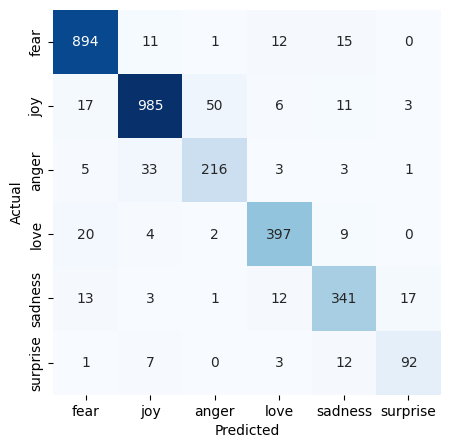

In [68]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label2id.keys(),
            yticklabels=label2id.keys(), cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Buid Prediction and Save

In [75]:
text = "I am super happy today. I got it done, Finally!!"


def get_prediction(text):

  inpute_encoded = tokenizer(text, return_tensors="pt").to(device)

  with torch.no_grad():
    outputs = model(**inpute_encoded)

  logits = outputs.logits

  pred = torch.argmax(logits, dim=1).item()
  return id2label[pred]


get_prediction(text)

'joy'

In [77]:
trainer.save_model("bert-base-uncased-sentiment-model")

In [78]:
from transformers import pipeline

In [79]:
classifier = pipeline("text-classification", "bert-base-uncased-sentiment-model")

Device set to use cuda:0


In [81]:
classifier([text, "hello, how are you?", "love you", "I'm feeling low", "I'm feeling blue"])

[{'label': 'joy', 'score': 0.975874662399292},
 {'label': 'joy', 'score': 0.6544336080551147},
 {'label': 'love', 'score': 0.8051697611808777},
 {'label': 'sadness', 'score': 0.9768045544624329},
 {'label': 'joy', 'score': 0.9161796569824219}]